In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [3]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split


In [4]:
# Load and clean the dataset
file_path = 'H:/Downloads/penguins_size.csv'
data = pd.read_csv(file_path)

# Drop rows with missing values in essential columns
cleaned_data = data.dropna(subset=['culmen_length_mm', 'culmen_depth_mm', 'species'])

# Select the features and target
X = cleaned_data[['culmen_length_mm', 'culmen_depth_mm']]
y = cleaned_data['species']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
from sklearn.metrics import accuracy_score

# Make predictions
y_pred = dt_clf_depth1.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

NameError: name 'dt_clf_depth1' is not defined

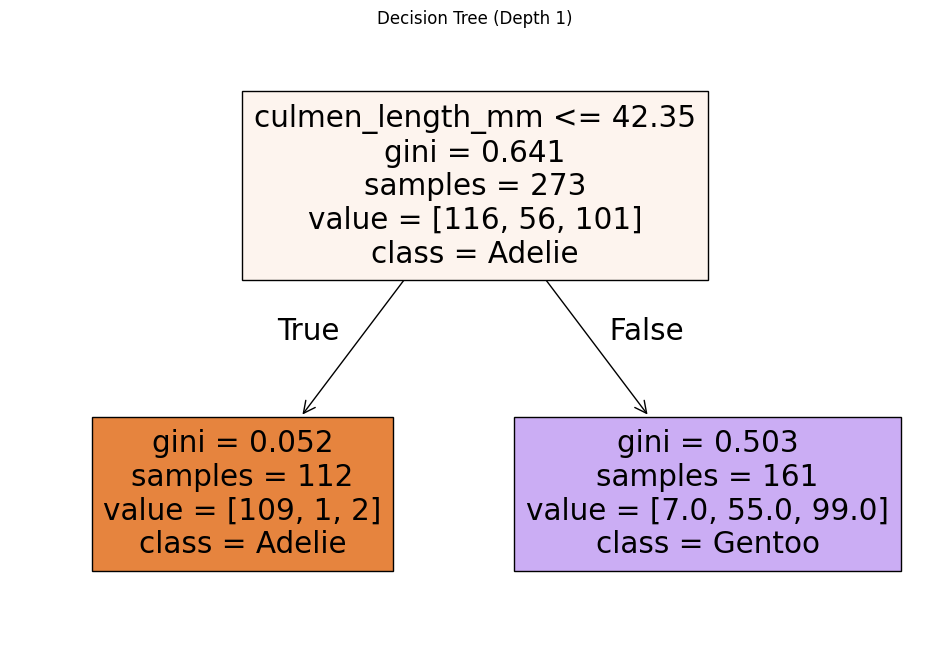

In [75]:
# Train a decision tree classifier with depth 1
dt_clf_depth1 = DecisionTreeClassifier(max_depth=1, random_state=42)
dt_clf_depth1.fit(X_train, y_train)

# Plot the tree for depth 1
plt.figure(figsize=(12, 8))
plot_tree(dt_clf_depth1, feature_names=['culmen_length_mm', 'culmen_depth_mm'], class_names=dt_clf_depth1.classes_, filled=True)
plt.title("Decision Tree (Depth 1)")
plt.show()



<Figure size 1000x600 with 0 Axes>

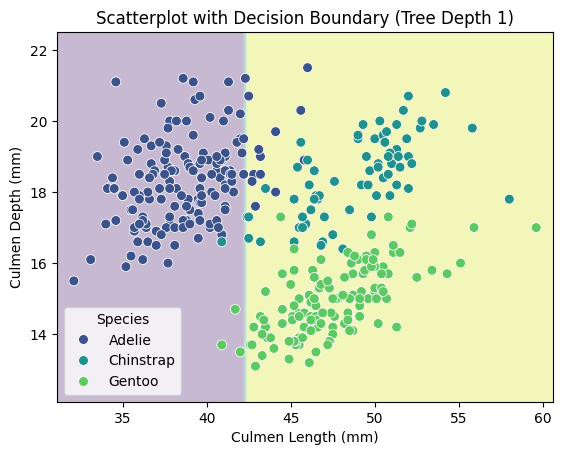

In [76]:
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(dt_clf_depth1, X_train, response_method='predict', alpha=0.3)
sns.scatterplot(data=cleaned_data, x='culmen_length_mm', y='culmen_depth_mm', hue='species', palette='viridis', edgecolor='w', s=50)
plt.title("Scatterplot with Decision Boundary (Tree Depth 1)")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.legend(title="Species")
plt.show()


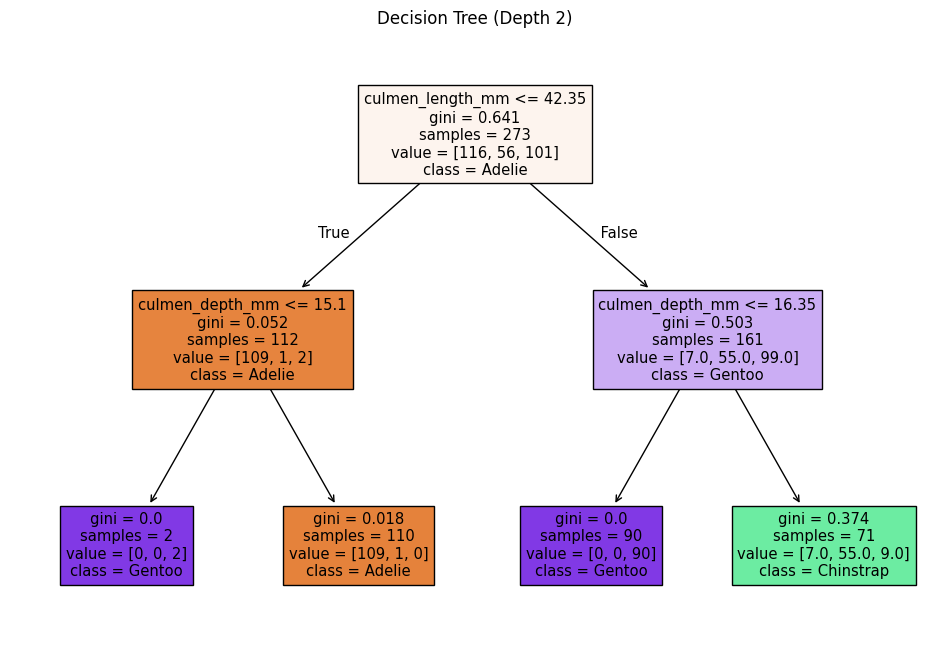

In [77]:
# Train a decision tree classifier with depth 2
dt_clf_depth2 = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_clf_depth2.fit(X_train, y_train)

# Plot the tree for depth 2
plt.figure(figsize=(12, 8))
plot_tree(dt_clf_depth2, feature_names=['culmen_length_mm', 'culmen_depth_mm'], class_names=dt_clf_depth2.classes_, filled=True)
plt.title("Decision Tree (Depth 2)")
plt.show()





<Figure size 1000x600 with 0 Axes>

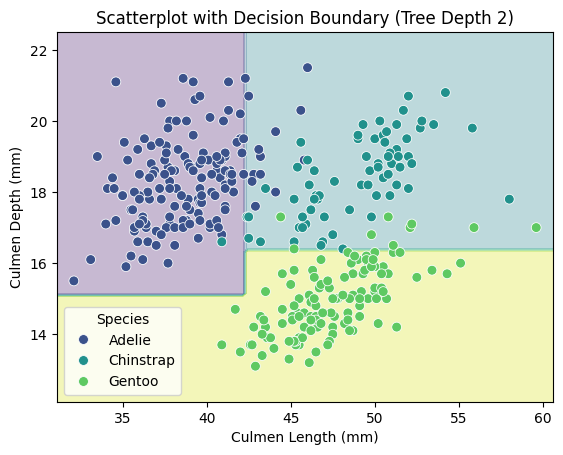

In [78]:
# Scatterplot for depth 2
plt.figure(figsize=(10, 6))
DecisionBoundaryDisplay.from_estimator(dt_clf_depth2, X_train, response_method='predict', alpha=0.3)
sns.scatterplot(data=cleaned_data, x='culmen_length_mm', y='culmen_depth_mm', hue='species', palette='viridis', edgecolor='w', s=50)
plt.title("Scatterplot with Decision Boundary (Tree Depth 2)")
plt.xlabel("Culmen Length (mm)")
plt.ylabel("Culmen Depth (mm)")
plt.legend(title="Species")
plt.show()



Prediction probabilities (Depth 1): [[0.97321429 0.00892857 0.01785714]]
Predicted class (Depth 1): Adelie
Prediction probabilities (Depth 2): [[0.99090909 0.00909091 0.        ]]
Predicted class (Depth 2): Adelie


c:\Users\CYTech Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\CYTech Student\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


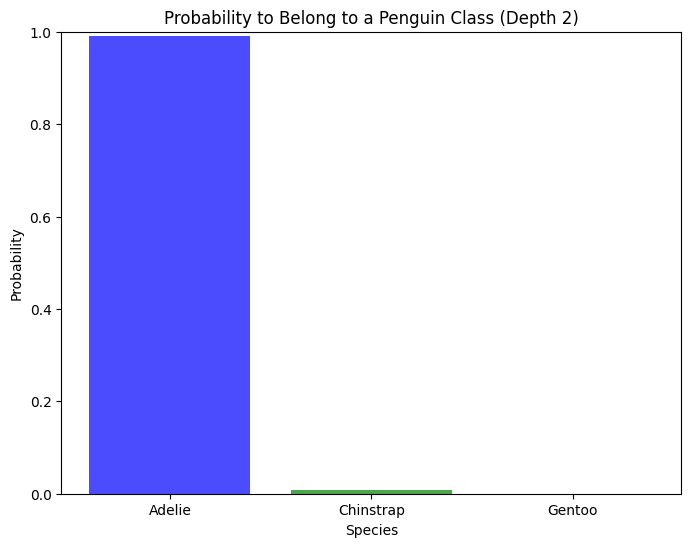

In [82]:
# New sample prediction for depth 2

# Define the new sample for prediction
new_sample = np.array([[35, 17]])

# New sample prediction for depth 1
pred_prob_depth1 = dt_clf_depth1.predict_proba(new_sample)
pred_class_depth1 = dt_clf_depth1.predict(new_sample)
print(f"Prediction probabilities (Depth 1): {pred_prob_depth1}")
print(f"Predicted class (Depth 1): {pred_class_depth1[0]}")

# New sample prediction for depth 2
pred_prob_depth2 = dt_clf_depth2.predict_proba(new_sample)
pred_class_depth2 = dt_clf_depth2.predict(new_sample)
print(f"Prediction probabilities (Depth 2): {pred_prob_depth2}")
print(f"Predicted class (Depth 2): {pred_class_depth2[0]}")

# Bar plot for prediction probabilities (Depth 2)
plt.figure(figsize=(8, 6))
species_names = dt_clf_depth2.classes_
probabilities = pred_prob_depth2[0]

plt.bar(species_names, probabilities, color=['blue', 'green', 'orange'], alpha=0.7)
plt.title("Probability to Belong to a Penguin Class (Depth 2)")
plt.xlabel("Species")
plt.ylabel("Probability")
plt.ylim(0, 1)  # Ensure the y-axis ranges from 0 to 1
plt.show()



In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score, confusion_matrix, roc_curve, auc, precision_recall_curve, classification_report
)
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the dataset
file_path = 'H:/Downloads/data.csv'
data = pd.read_csv(file_path)
data = data.drop(columns=['id', 'Unnamed: 32'])  # Drop irrelevant columns
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})  # Map diagnosis to binary

# Select features and target variable
features = ['radius_mean', 'concave points_mean']
X = data[features]
y = data['diagnosis']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)





First five predictions (Decision Tree): [1 1 0 1 1]


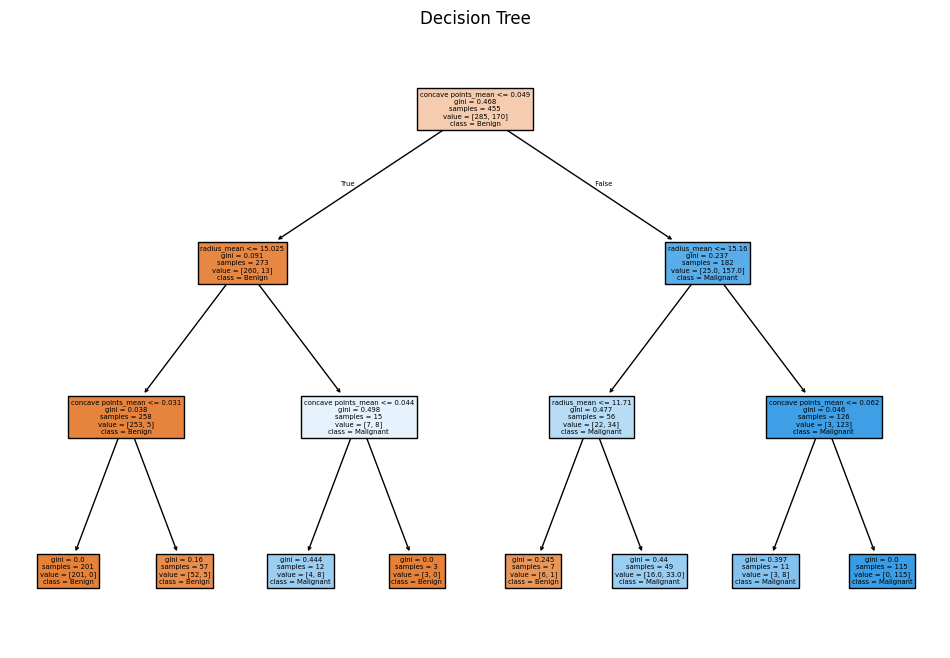

In [10]:
# Exercise 3.1: Train a decision tree classifier
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

# Display first five predictions
print("First five predictions (Decision Tree):", y_pred_dt[:5])

# Visualize the classification tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=features, class_names=['Benign', 'Malignant'], filled=True)
plt.title("Decision Tree")
plt.show()

In [11]:
# Exercise 3.2: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=6, random_state=1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Accuracy comparison
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf:.4f}")


Accuracy (Random Forest): 0.9123


Best k value for kNN: 6
Accuracy (kNN): 0.8772


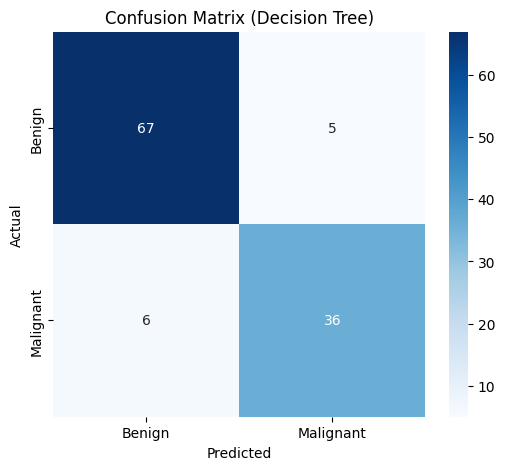

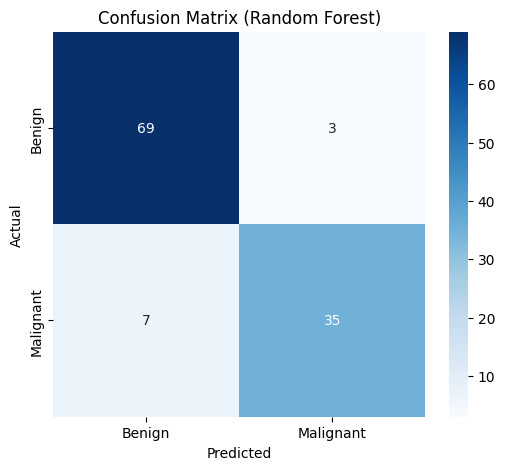

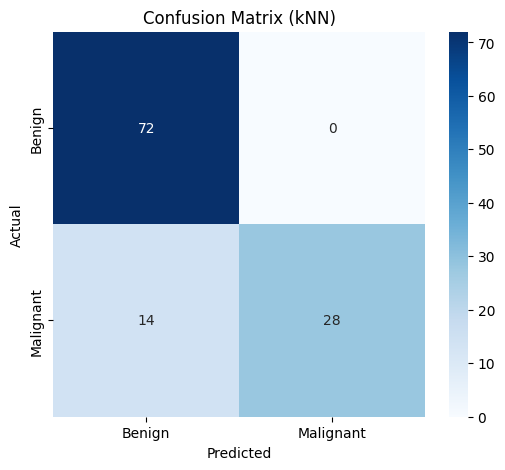

Classification Report (Decision Tree):
              precision    recall  f1-score   support

      Benign       0.92      0.93      0.92        72
   Malignant       0.88      0.86      0.87        42

    accuracy                           0.90       114
   macro avg       0.90      0.89      0.90       114
weighted avg       0.90      0.90      0.90       114

Classification Report (Random Forest):
              precision    recall  f1-score   support

      Benign       0.91      0.96      0.93        72
   Malignant       0.92      0.83      0.88        42

    accuracy                           0.91       114
   macro avg       0.91      0.90      0.90       114
weighted avg       0.91      0.91      0.91       114

Classification Report (kNN):
              precision    recall  f1-score   support

      Benign       0.84      1.00      0.91        72
   Malignant       1.00      0.67      0.80        42

    accuracy                           0.88       114
   macro avg       0.

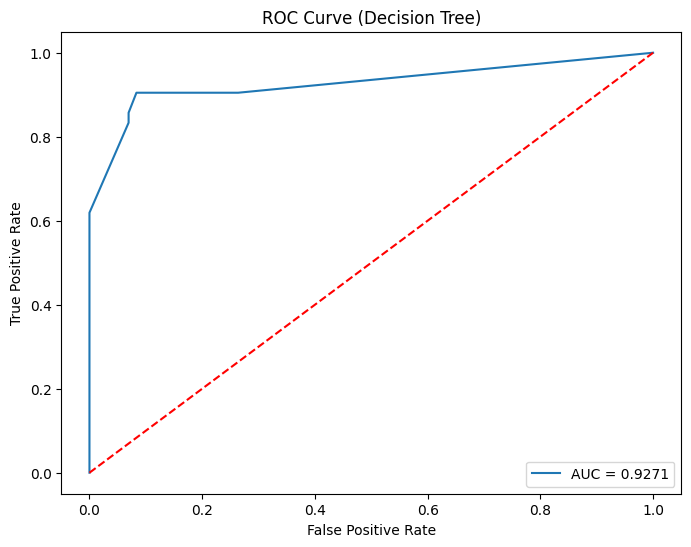

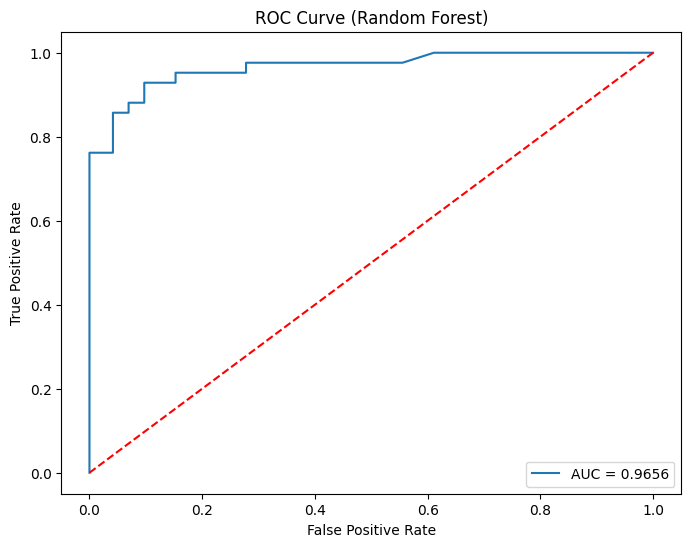

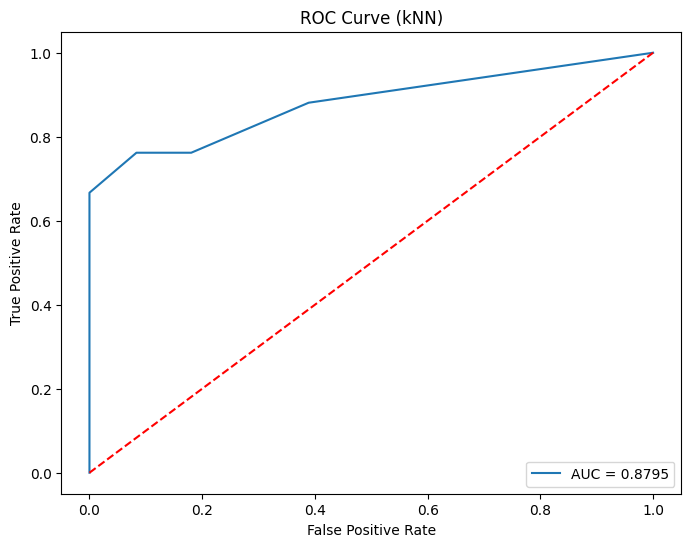

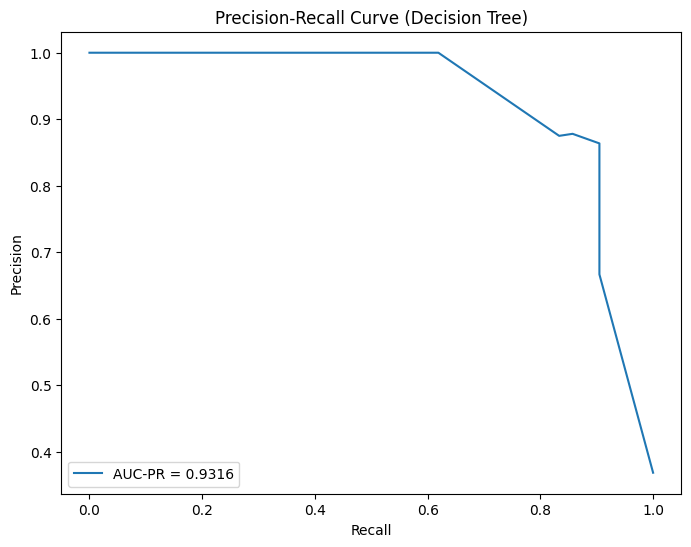

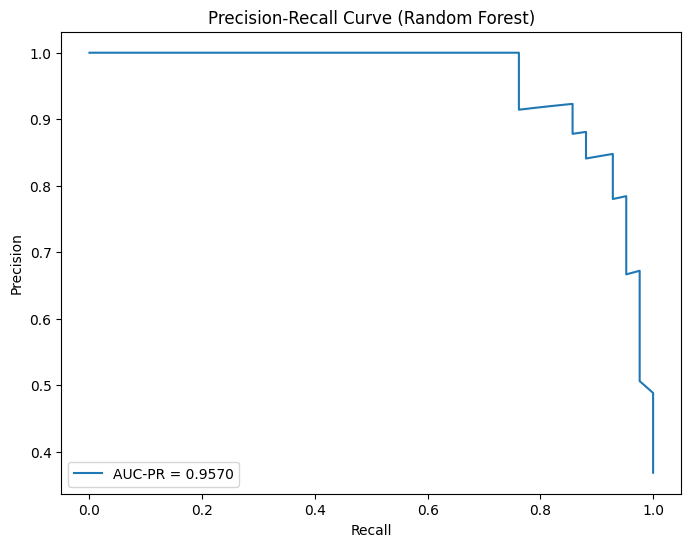

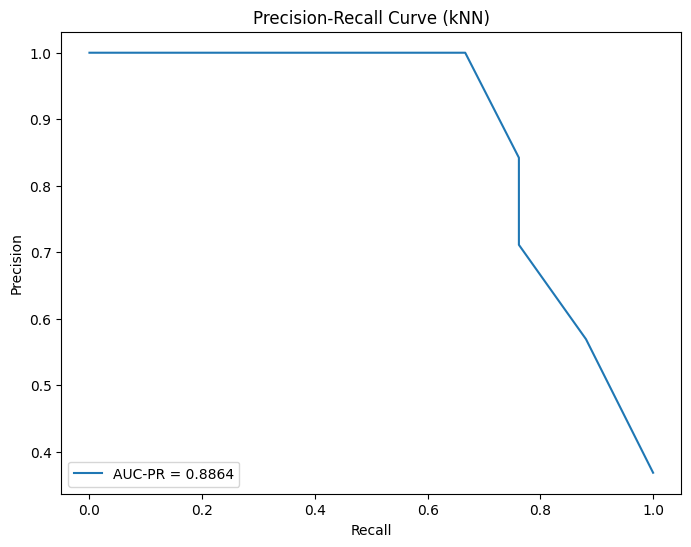

In [12]:
# Exercise 3.3: k-Nearest Neighbors with Grid Search
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best k value
best_k = grid_search.best_params_['n_neighbors']
print(f"Best k value for kNN: {best_k}")

# Train kNN with best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

# Accuracy for kNN
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (kNN): {accuracy_knn:.4f}")

# Confusion Matrix for all models
models = {'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf, 'kNN': y_pred_knn}
for model_name, y_pred in models.items():
    conf_matrix = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix ({model_name})")
    plt.show()

# Classification Report for all models
for model_name, y_pred in models.items():
    print(f"Classification Report ({model_name}):")
    print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

# ROC Curve and AUC for all models
for model_name, (y_pred, y_prob) in {
    'Decision Tree': (y_pred_dt, y_prob_dt),
    'Random Forest': (y_pred_rf, y_prob_rf),
    'kNN': (y_pred_knn, y_prob_knn),
}.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve ({model_name})")
    plt.legend(loc="lower right")
    plt.show()

# Precision-Recall Curve and AUC for all models
for model_name, y_prob in {
    'Decision Tree': y_prob_dt,
    'Random Forest': y_prob_rf,
    'kNN': y_prob_knn,
}.items():
    precision, recall, _ = precision_recall_curve(y_test, y_prob)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, label=f"AUC-PR = {pr_auc:.4f}")
    plt.xlabel("Recall")
    plt.ylabel("Precision")
    plt.title(f"Precision-Recall Curve ({model_name})")
    plt.legend(loc="lower left")
    plt.show()

In [13]:
from sklearn.model_selection import RandomizedSearchCV

# Exercise 3.4: Hyperparameter Tuning for Random Forest
# Define the parameter grid for Grid Search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(
    RandomForestClassifier(random_state=1),
    param_grid_rf,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
grid_search_rf.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params_grid = grid_search_rf.best_params_
best_score_grid = grid_search_rf.best_score_

print("Grid Search Results:")
print("Best Parameters (Random Forest):", best_params_grid)
print(f"Best Cross-Validated Accuracy: {best_score_grid:.4f}")

# Define the parameter distribution for Randomized Search
param_dist_rf = {
    'n_estimators': [int(x) for x in range(50, 201, 10)],
    'max_depth': [None] + list(range(10, 51, 10)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}



Fitting 5 folds for each of 108 candidates, totalling 540 fits
Grid Search Results:
Best Parameters (Random Forest): {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best Cross-Validated Accuracy: 0.9033


Fitting 5 folds for each of 50 candidates, totalling 250 fits

Randomized Search Results:
Best Parameters (Random Forest): {'n_estimators': 190, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Best Cross-Validated Accuracy: 0.9055

Final Model Evaluation:
Test Set Accuracy: 0.9211


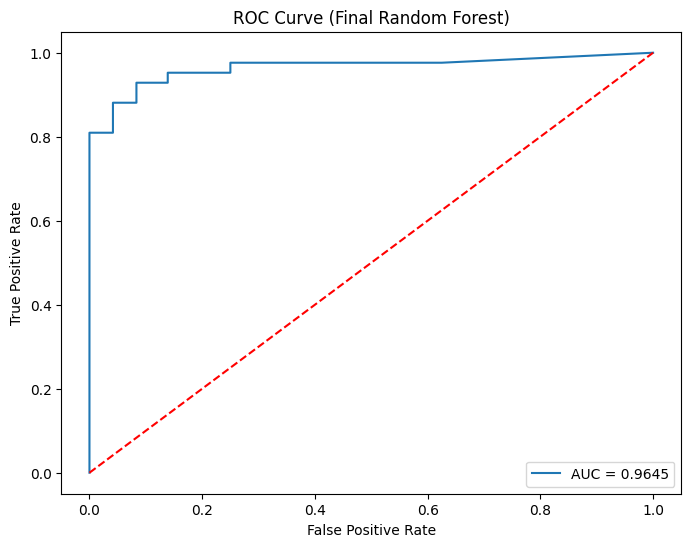

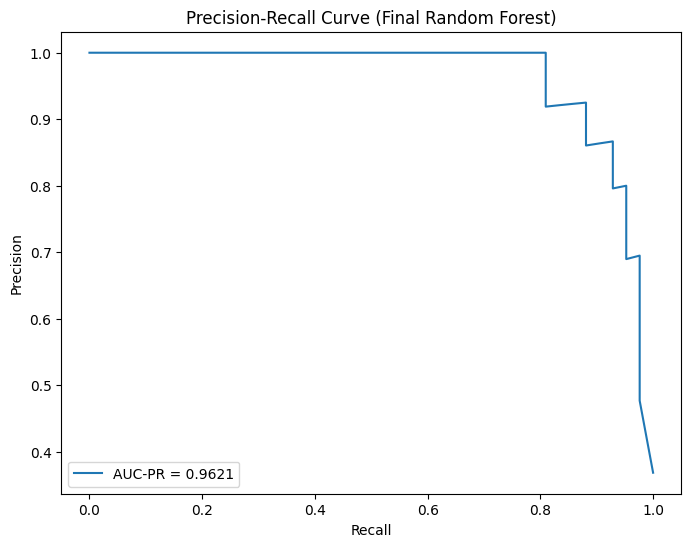


Rationale for Chosen Model:
Grid Search and Randomized Search allow for systematic exploration of hyperparameters.
The best model was chosen based on cross-validated accuracy during Randomized Search.
This method is computationally efficient and ensures that we test a wide range of parameter combinations.


In [14]:
# Perform Randomized Search
random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(random_state=1),
    param_dist_rf,
    n_iter=50,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1,
    random_state=1
)
random_search_rf.fit(X_train, y_train)

# Get the best parameters and accuracy
best_params_random = random_search_rf.best_params_
best_score_random = random_search_rf.best_score_

print("\nRandomized Search Results:")
print("Best Parameters (Random Forest):", best_params_random)
print(f"Best Cross-Validated Accuracy: {best_score_random:.4f}")

# Train the final Random Forest model with the best parameters from Randomized Search
final_rf = RandomForestClassifier(**best_params_random, random_state=1)
final_rf.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final_rf = final_rf.predict(X_test)
y_prob_final_rf = final_rf.predict_proba(X_test)[:, 1]
final_accuracy_rf = accuracy_score(y_test, y_pred_final_rf)

print("\nFinal Model Evaluation:")
print(f"Test Set Accuracy: {final_accuracy_rf:.4f}")

# Visualize the ROC Curve for the final model
fpr, tpr, _ = roc_curve(y_test, y_prob_final_rf)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.4f}")
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Final Random Forest)")
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve for the final model
precision, recall, _ = precision_recall_curve(y_test, y_prob_final_rf)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AUC-PR = {pr_auc:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve (Final Random Forest)")
plt.legend(loc="lower left")
plt.show()

# Explanation of Chosen Model
print("\nRationale for Chosen Model:")
print("Grid Search and Randomized Search allow for systematic exploration of hyperparameters.")
print("The best model was chosen based on cross-validated accuracy during Randomized Search.")
print("This method is computationally efficient and ensures that we test a wide range of parameter combinations.")


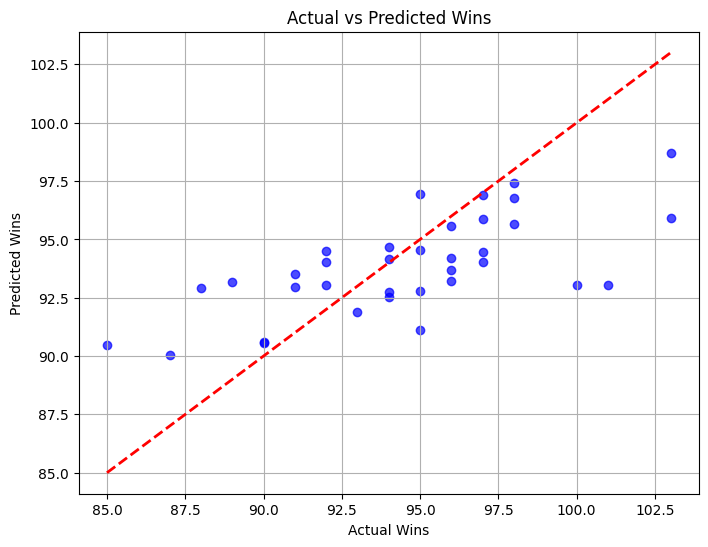

Equation of the Model:
W = 0.085*RS + -0.063*RA + -106.478*OBP + -22.385*SLG + 0.014*BA + -100.673*OOBP + 33.250*OSLG + 133.463
R^2 Score: 0.406
Mean Absolute Error (MAE): 2.471
Root Mean Squared Error (RMSE): 3.178

Interpretation of Results:
RS: A unit increase leads to an expected change of 0.085 in Wins (holding other factors constant).
RA: A unit increase leads to an expected change of -0.063 in Wins (holding other factors constant).
OBP: A unit increase leads to an expected change of -106.478 in Wins (holding other factors constant).
SLG: A unit increase leads to an expected change of -22.385 in Wins (holding other factors constant).
BA: A unit increase leads to an expected change of 0.014 in Wins (holding other factors constant).
OOBP: A unit increase leads to an expected change of -100.673 in Wins (holding other factors constant).
OSLG: A unit increase leads to an expected change of 33.250 in Wins (holding other factors constant).


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Load the dataset
file_path = 'H:/Downloads/baseball.csv'
baseball_data = pd.read_csv(file_path)

# Select relevant features and target
features = ['RS', 'RA', 'OBP', 'SLG', 'BA', 'OOBP', 'OSLG']
target = 'W'

# Drop rows with missing values
baseball_data = baseball_data.dropna()

# Split the data into train and test sets (70-30 split)
X = baseball_data[features]
y = baseball_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)





# Train a Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Coefficients and intercept of the model
coefficients = model.coef_
intercept = model.intercept_

# Equation of the model
equation = "W = " + " + ".join([f"{coef:.3f}*{feat}" for coef, feat in zip(coefficients, features)]) + f" + {intercept:.3f}"

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Scatterplot: Predicted vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="b")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Wins")
plt.ylabel("Predicted Wins")
plt.title("Actual vs Predicted Wins")
plt.grid()
plt.show()

# Display results
print("Equation of the Model:")
print(equation)
print(f"R^2 Score: {r2:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")

# Interpretation of coefficients
print("\nInterpretation of Results:")
for coef, feat in zip(coefficients, features):
    print(f"{feat}: A unit increase leads to an expected change of {coef:.3f} in Wins (holding other factors constant).")

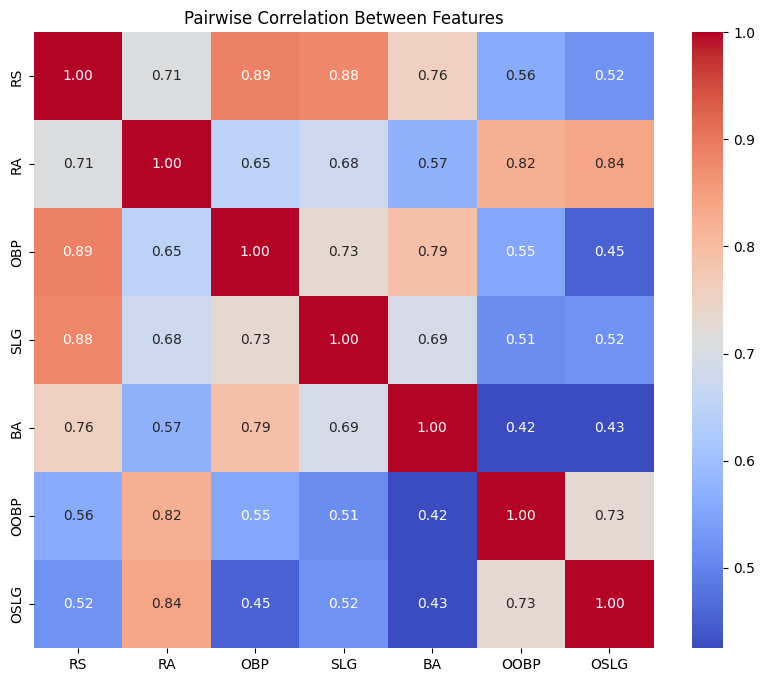


Model 1 Coefficients:
RS: 0.046
OBP: -145.091
Intercept: 106.717

Model 2 Coefficients:
RS: 0.075
OBP: -182.342
SLG: -99.187
Intercept: 138.349

Model 3 Coefficients:
RS: 0.076
OBP: -203.081
SLG: -106.358
BA: 41.733
Intercept: 137.131

Model 4 Coefficients:
RS: 0.085
RA: -0.063
OBP: -106.478
SLG: -22.385
BA: 0.014
OOBP: -100.673
OSLG: 33.250
Intercept: 133.463

Summary Table:
     Model                            Features  Train Error  Test Error  \
0  Model 1                           [RS, OBP]    22.378013   15.367496   
1  Model 2                      [RS, OBP, SLG]    21.521697   17.307620   
2  Model 3                  [RS, OBP, SLG, BA]    21.450129   18.002150   
3  Model 4  [RS, RA, OBP, SLG, BA, OOBP, OSLG]     9.932612   10.100341   

          SAW        R2  
0  145.136594  0.095552  
1  281.604015 -0.018633  
2  351.247593 -0.059510  
3  262.947290  0.405548  

Overfitting Analysis:
Model 1 - Overfitting: No
Model 2 - Overfitting: No
Model 3 - Overfitting: No
Model 4 - Ove

In [16]:
# 1. Generate pairwise correlation between features
correlation_matrix = X.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Pairwise Correlation Between Features')
plt.show()

# 2. Train models with different feature sets
feature_sets = [
    ['RS', 'OBP'],
    ['RS', 'OBP', 'SLG'],
    ['RS', 'OBP', 'SLG', 'BA'],
    features  # All features
]

model_results = []

for idx, feature_set in enumerate(feature_sets, start=1):
    # Prepare data
    X_train_subset = X_train[feature_set]
    X_test_subset = X_test[feature_set]

    # Train model
    model = LinearRegression()
    model.fit(X_train_subset, y_train)

    # Predict on train and test data
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test_subset)

    # Calculate errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Calculate sum of absolute weights (SAW)
    saw = np.sum(np.abs(model.coef_))

    # R2 score
    r2 = r2_score(y_test, y_test_pred)

    # Print coefficients and intercept for each model
    print(f"\n{f'Model {idx}'} Coefficients:")
    for coef, feat in zip(model.coef_, feature_set):
        print(f"{feat}: {coef:.3f}")
    print(f"Intercept: {model.intercept_:.3f}")

    # Store results
    model_results.append({
        'Model': f'Model {idx}',
        'Features': feature_set,
        'Train Error': train_error,
        'Test Error': test_error,
        'SAW': saw,
        'R2': r2
    })

# 5. Summarize results in a table
results_df = pd.DataFrame(model_results)
print("\nSummary Table:")
print(results_df)

# 6. Check for overfitting
print("\nOverfitting Analysis:")
for idx, result in results_df.iterrows():
    overfitting_status = "Yes" if result['Train Error'] < result['Test Error'] else "No"
    print(f"{result['Model']} - Overfitting: {overfitting_status}")

# 7. Check for model complexity
print("\nModel Complexity Analysis:")
print("Higher SAW values indicate more complex models, as they rely heavily on feature weights.")
for idx, result in results_df.iterrows():
    print(f"{result['Model']} - SAW: {result['SAW']:.3f}")

     Model                            Features  Train Error  Test Error  \
0  Model 1                           [RS, OBP]    22.378013   15.367496   
1  Model 2                      [RS, OBP, SLG]    21.521697   17.307620   
2  Model 3                  [RS, OBP, SLG, BA]    21.450129   18.002150   
3  Model 4  [RS, RA, OBP, SLG, BA, OOBP, OSLG]     9.932612   10.100341   
4    Ridge                        All Features    10.902784    9.738176   
5    Lasso                        All Features    10.910854    9.743430   

          SAW        R2  
0  145.136594  0.095552  
1  281.604015 -0.018633  
2  351.247593 -0.059510  
3  262.947290  0.405548  
4    1.227788  0.426863  
5    0.135556  0.426554  


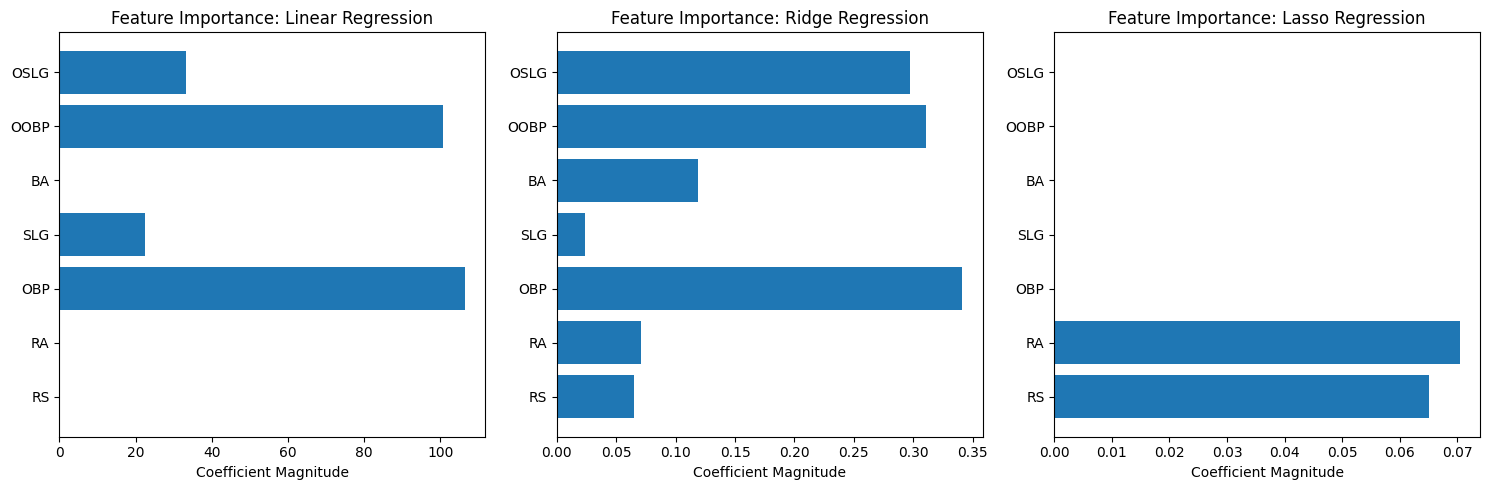

Optimal alpha for Ridge: 0.001
Optimal alpha for Lasso: 0.021544346900318832


In [17]:
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

# 1. Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)

# Evaluate Ridge
ridge_train_pred = ridge.predict(X_train)
ridge_test_pred = ridge.predict(X_test)

ridge_train_error = mean_squared_error(y_train, ridge_train_pred)
ridge_test_error = mean_squared_error(y_test, ridge_test_pred)
ridge_saw = np.sum(np.abs(ridge.coef_))
ridge_r2 = r2_score(y_test, ridge_test_pred)

# Add Ridge results to summary
ridge_result = {
    'Model': 'Ridge',
    'Features': 'All Features',
    'Train Error': ridge_train_error,
    'Test Error': ridge_test_error,
    'SAW': ridge_saw,
    'R2': ridge_r2
}
model_results.append(ridge_result)

# 2. Lasso Regression
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)

# Evaluate Lasso
lasso_train_pred = lasso.predict(X_train)
lasso_test_pred = lasso.predict(X_test)

lasso_train_error = mean_squared_error(y_train, lasso_train_pred)
lasso_test_error = mean_squared_error(y_test, lasso_test_pred)
lasso_saw = np.sum(np.abs(lasso.coef_))
lasso_r2 = r2_score(y_test, lasso_test_pred)

# Add Lasso results to summary
lasso_result = {
    'Model': 'Lasso',
    'Features': 'All Features',
    'Train Error': lasso_train_error,
    'Test Error': lasso_test_error,
    'SAW': lasso_saw,
    'R2': lasso_r2
}
model_results.append(lasso_result)

# 3. Feature Importance for Lasso
lasso_feature_importance = pd.Series(lasso.coef_, index=features)
relevant_features = lasso_feature_importance[lasso_feature_importance != 0]
irrelevant_features = lasso_feature_importance[lasso_feature_importance == 0]

# 4. Compare metrics
results_df = pd.DataFrame(model_results)
print(results_df)

# 5. Plots: Feature Importance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(features, np.abs(model.coef_))
plt.title('Feature Importance: Linear Regression')
plt.xlabel('Coefficient Magnitude')

plt.subplot(1, 3, 2)
plt.barh(features, np.abs(ridge.coef_))
plt.title('Feature Importance: Ridge Regression')
plt.xlabel('Coefficient Magnitude')

plt.subplot(1, 3, 3)
plt.barh(features, np.abs(lasso.coef_))
plt.title('Feature Importance: Lasso Regression')
plt.xlabel('Coefficient Magnitude')

plt.tight_layout()
plt.show()

# 6. Cross-validation for hyperparameter tuning
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=10)
ridge_cv.fit(X_train, y_train)
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 10), cv=10)
lasso_cv.fit(X_train, y_train)

# Display optimal alpha values
print(f"Optimal alpha for Ridge: {ridge_cv.alpha_}")
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_}")


Model Performance Summary:
               Model  Train Error  Test Error         SAW        R2
0  Linear Regression     9.932612   10.100341  262.947290  0.405548
1              Ridge    10.902784    9.738176    1.227788  0.426863
2              Lasso    10.910854    9.743430    0.135556  0.426554


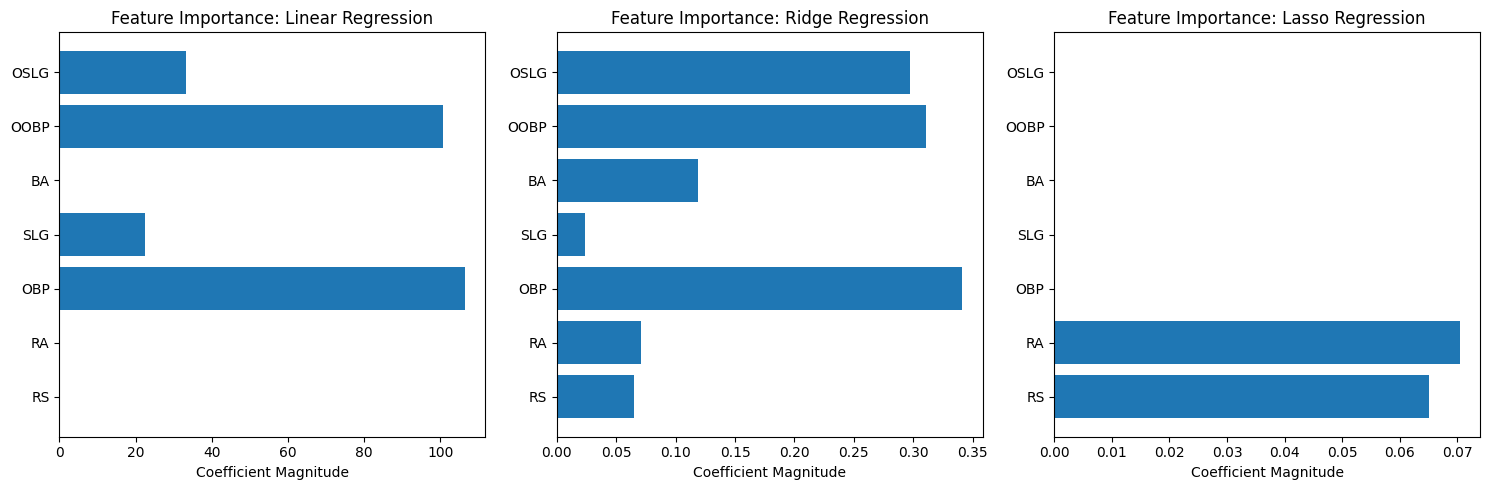

Optimal alpha for Ridge: 0.001
Optimal alpha for Lasso: 0.021544346900318832

Final Model Performance Summary with Cross-Validation:
               Model  Train Error  Test Error         SAW        R2
0  Linear Regression     9.932612   10.100341  262.947290  0.405548
1              Ridge    10.902784    9.738176    1.227788  0.426863
2              Lasso    10.910854    9.743430    0.135556  0.426554
3         Ridge (CV)     9.986379    9.785905  205.079975  0.424054
4         Lasso (CV)    10.910806    9.740842    0.135769  0.426706


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming these are already defined
# X_train, X_test, y_train, y_test: Training and testing datasets
# features: List of feature names
model_results = []

# Function for evaluating models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_error = mean_squared_error(y_train, train_pred)
    test_error = mean_squared_error(y_test, test_pred)
    saw = np.sum(np.abs(model.coef_))
    r2 = r2_score(y_test, test_pred)
    
    return {
        'Model': model_name,
        'Train Error': train_error,
        'Test Error': test_error,
        'SAW': saw,
        'R2': r2
    }

# 1. Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_result = evaluate_model(linear_model, "Linear Regression", X_train, y_train, X_test, y_test)
model_results.append(linear_result)

# 2. Ridge Regression
ridge = Ridge(alpha=1)
ridge.fit(X_train, y_train)
ridge_result = evaluate_model(ridge, "Ridge", X_train, y_train, X_test, y_test)
model_results.append(ridge_result)

# 3. Lasso Regression
lasso = Lasso(alpha=0.2)
lasso.fit(X_train, y_train)
lasso_result = evaluate_model(lasso, "Lasso", X_train, y_train, X_test, y_test)
model_results.append(lasso_result)

# Feature Importance
lasso_feature_importance = pd.Series(lasso.coef_, index=features)
relevant_features = lasso_feature_importance[lasso_feature_importance != 0]
irrelevant_features = lasso_feature_importance[lasso_feature_importance == 0]

# Summary Results
results_df = pd.DataFrame(model_results)
print("Model Performance Summary:")
print(results_df)

# Plots: Feature Importance
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.barh(features, np.abs(linear_model.coef_))
plt.title('Feature Importance: Linear Regression')
plt.xlabel('Coefficient Magnitude')

plt.subplot(1, 3, 2)
plt.barh(features, np.abs(ridge.coef_))
plt.title('Feature Importance: Ridge Regression')
plt.xlabel('Coefficient Magnitude')

plt.subplot(1, 3, 3)
plt.barh(features, np.abs(lasso.coef_))
plt.title('Feature Importance: Lasso Regression')
plt.xlabel('Coefficient Magnitude')

plt.tight_layout()
plt.show()

# 6. Cross-Validation for Hyperparameter Tuning
ridge_cv = RidgeCV(alphas=np.logspace(-3, 3, 10), cv=10)
ridge_cv.fit(X_train, y_train)
lasso_cv = LassoCV(alphas=np.logspace(-3, 3, 10), cv=10)
lasso_cv.fit(X_train, y_train)

# Display Optimal Alphas and Cross-Validation Results
print(f"Optimal alpha for Ridge: {ridge_cv.alpha_}")
print(f"Optimal alpha for Lasso: {lasso_cv.alpha_}")

ridge_cv_result = evaluate_model(ridge_cv, "Ridge (CV)", X_train, y_train, X_test, y_test)
lasso_cv_result = evaluate_model(lasso_cv, "Lasso (CV)", X_train, y_train, X_test, y_test)
model_results.append(ridge_cv_result)
model_results.append(lasso_cv_result)

# Final Summary with Cross-Validation
final_results_df = pd.DataFrame(model_results)
print("\nFinal Model Performance Summary with Cross-Validation:")
print(final_results_df)
